# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from pprint import pprint 
from datetime import datetime

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [81]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [82]:
# #TEST CODE - WORKS
# base_url = "http://api.openweathermap.org/data/2.5/weather?"

# units = "imperial"
# x = "Seoul"
# base_url = "http://api.openweathermap.org/data/2.5/weather?"
# query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
# response = requests.get(query_url + x).json()
# pprint(response)


In [83]:
#LOOP CODE - KEY ERROR on api response dictionary keys

# Create variables for API get
units = "imperial"
base_url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
    
# Create empty lists to hold data from API get
city = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Run loop with try/except to skip over cities not in Open Weather data
for index, x in enumerate(cities):
    try:
        response = requests.get(query_url + x).json()
        city.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])               
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Processing Record {index}| {x}")
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")



Processing Record 0| nianzishan
Processing Record 1| bluff
Processing Record 2| awbari
Processing Record 3| nowy dwor gdanski
Processing Record 4| hithadhoo
Processing Record 5| lasa
Processing Record 6| christchurch
Processing Record 7| clarence town
Processing Record 8| kahului
Processing Record 9| naze
Processing Record 10| vysokogornyy
Processing Record 11| albany
Processing Record 12| nikolskoye
Processing Record 13| vaini
Processing Record 14| altay
Processing Record 15| atuona
City not found. Skipping...
City not found. Skipping...
Processing Record 18| jobabo
Processing Record 19| portland
Processing Record 20| rikitea
Processing Record 21| lander
Processing Record 22| severo-kurilsk
Processing Record 23| bathsheba
Processing Record 24| georgetown
Processing Record 25| ushuaia
Processing Record 26| cockburn town
City not found. Skipping...
Processing Record 28| nanortalik
Processing Record 29| tiksi
Processing Record 30| broken hill
Processing Record 31| kodiak
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [84]:
# Setup data frame

weather_dict = {
    "City": city,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "WindSpeed": wind_speed,
    "Country": country,
    "Date": date
}

weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv("./output/weather_data.csv")
weather_data


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,WindSpeed,Country,Date
0,Nianzishan,47.52,122.88,56.05,46,4,4.00,CN,1589042647
1,Bluff,-46.60,168.33,52.68,80,30,10.18,NZ,1589042058
2,Ubari,26.59,12.78,96.85,9,0,11.03,LY,1589042149
3,Nowy Dwór Gdański,54.21,19.12,59.00,58,37,6.93,PL,1589042648
4,Hithadhoo,-0.60,73.08,85.14,79,100,13.87,MV,1589041968
...,...,...,...,...,...,...,...,...,...
564,Preeceville,51.95,-102.67,37.22,75,100,7.45,CA,1589042584
565,Whitehorse,60.72,-135.05,53.01,45,20,2.24,CA,1589042793
566,Pisco,-13.70,-76.22,71.01,82,30,8.05,PE,1589042793
567,Celestún,20.87,-90.40,88.32,58,86,4.94,MX,1589042794


In [86]:
# Set date of when data was pulled 

date = pd.to_datetime(weather_data['Date'], unit='s')
date = date.dt.strftime('%m/%d/%Y')
date = date.loc[0]
date

'05/09/2020'

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [87]:
test = weather_data.drop(weather_data[weather_data['Humidity'] > 100].index)
len(test)


569

In [88]:
#  Get the indices of cities that have humidity over 100%.


In [89]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [90]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

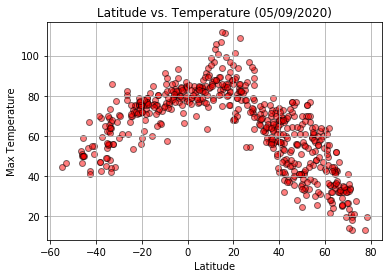

In [91]:
# Create scatter plot for Lat vs Temp
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], color='red', alpha=.5, edgecolors='black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title(f'Latitude vs. Temperature ({date})')
plt.savefig('./output/lat_vs_temp', format='png')

##### Latitude vs. Temperature Scatter Plot Analysis
Scatter plot shows a distinct curve. The highest temperatures at the peak of the curve are around 0 latitude, also known as the equator. Temperatures drop as the latitude goes up or down towards north and south poles.


## Latitude vs. Humidity Plot

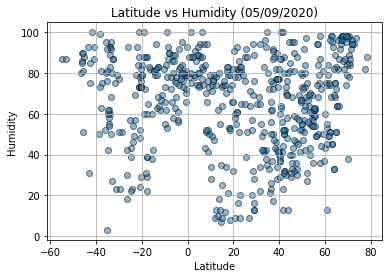

In [92]:
# Create scatter plot for Lat vs Humidity
plt.scatter(weather_data['Lat'], weather_data['Humidity'], alpha=.5, edgecolors='black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Latitude vs Humidity ({date})')
plt.savefig('./output/lat_vs_humidity', format='png')

##### Latitude vs. Humidity Scatter Plot Analysis
Scatter plot shows high humidity across all latitudes with lower humidity around -20 latitude and 20-40 latitude. No lower humidity levels around the equator, only high humidity. 

## Latitude vs. Cloudiness Plot

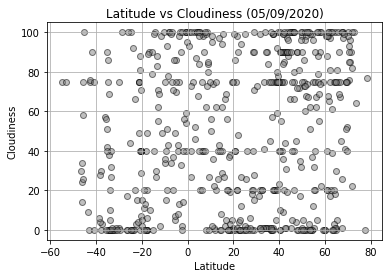

In [93]:
# Create scatter plot for Lat vs Cloudiness
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], color='grey', alpha=.5, edgecolors='black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Latitude vs Cloudiness ({date})')
plt.savefig('./output/lat_vs_cloudiness', format='png')

##### Latitude vs. Cloudiness Scatter Plot Analysis
Scatter plot shows fairly even levels of cloudiness across all latitudes with highest clusters of cities at same cloudiness at 0 and 100. 

## Latitude vs. Wind Speed Plot

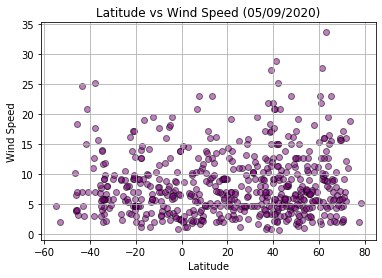

In [94]:
# Create scatter plot for Lat vs Wind Speed
plt.scatter(weather_data['Lat'], weather_data['WindSpeed'], color='purple', alpha=.5, edgecolors='black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'Latitude vs Wind Speed ({date})')
plt.savefig('./output/lat_vs_wind_speed', format='png')

##### Latitude vs. Wind Speed Scatter Plot Analysis
Scatter plot shows fairly low and even wind speeds across all latitudes. 

## Linear Regression

In [95]:
# OPTIONAL: Create a function to create Linear Regression plots

In [96]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_data.where(weather_data['Lat'] > 0)
northern_hemisphere = northern_hemisphere.dropna()

southern_hemisphere = weather_data.where(weather_data['Lat'] < 0)
southern_hemisphere = southern_hemisphere.dropna()


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7052045484049414


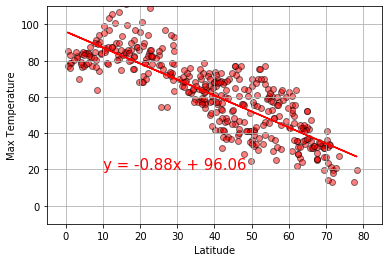

In [97]:
# Set x and y values
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']

# Calculate linear regression, line equation and r squared
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2

# Create scatter plot with line equation
plt.scatter(x_values, y_values, color='red', alpha=.5, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.xlim(-5, 85)
plt.ylim(-10,110)
print(f"The r-squared is: {rvalue**2}")
plt.show()

##### Latitude vs. Temperature Linear Regression (Northern Hemisphere) Analysis
Linear regression shows a very distinct linear relationship between temp and latitude: highest temps are near the equator and temps drop as latitude moves away from the equator. R-squared value is high.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.622958334297178


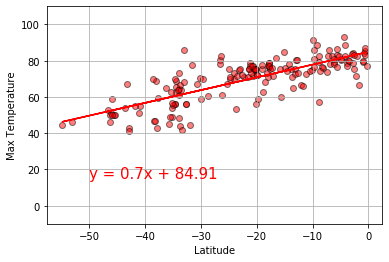

In [98]:
# Set x and y values
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']

# Calculate linear regression, line equation and r squared
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2

# Create scatter plot with line equation
plt.scatter(x_values, y_values, color='red', alpha=.5, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.ylim(-10,110)
print(f"The r-squared is: {rvalue**2}")
plt.show()

##### Latitude vs. Temperature Linear Regression (Southern Hemisphere) Analysis
Linear regression show distinct relationship again between temp and latitude: lowest temps are furthest away from the equator and highest temps near the equator. R-squared value is fairly high.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.014296133345324846


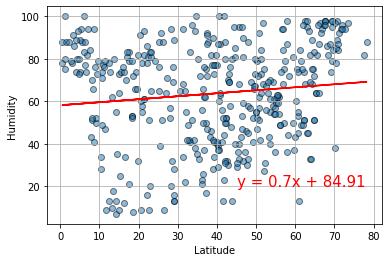

In [99]:
# Set x and y values
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']

# Calculate linear regression, line equation and r squared
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
r_squared = rvalue**2

# Create scatter plot with line equation
plt.scatter(x_values, y_values, alpha=.5, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

##### Latitude vs. Humidity Linear Regression (Northern Hemisphere) Analysis
Linear regression shows only slight relationship and r-squared value is very low, both indicating very little relationship between humidity and latitude. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0028531790089921243


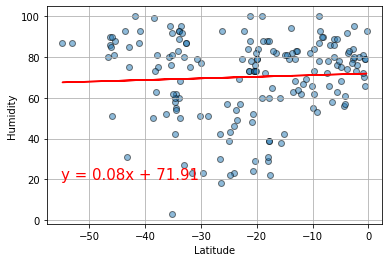

In [100]:
# Set x and y values
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']

# Calculate linear regression, line equation and r squared
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2

# Create scatter plot with line equation
plt.scatter(x_values, y_values, alpha=.5, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

##### Latitude vs. Humidity Linear Regression (Southern Hemisphere) Analysis
Linear regression shows only slight relationship and r-squared value is very low, both indicating very little relationship between humidity and latitude. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.012920415144712531


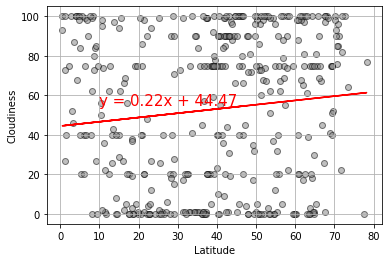

In [101]:
# Set x and y values
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']

# Calculate linear regression, line equation and r squared
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2

# Create scatter plot with line equation
plt.scatter(x_values, y_values, alpha=.5, color='grey', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,55),fontsize=15,color="red")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

##### Latitude vs. Cloudiness Linear Regression (Northern Hemisphere) Analysis
Linear regression shows only slight relationship and r-squared value is very low, both indicating very little relationship between humidity and latitude. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06386158914569139


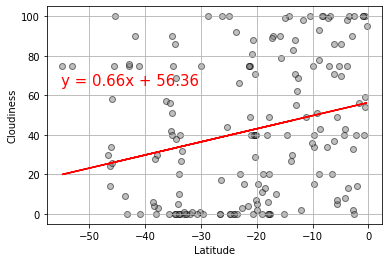

In [102]:
# Set x and y values
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']

# Calculate linear regression, line equation and r squared
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2

# Create scatter plot with line equation
plt.scatter(x_values, y_values, color='grey', alpha=.5, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,65),fontsize=15,color="red")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

##### Latitude vs. Cloudiness Linear Regression (Southern Hemisphere) Analysis
Linear regression shows more of a relationship between cloudiness and latitude: as latitude goes down towards South Pole, cloudiness goes down. R-squared value is very low.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.007530847387540433


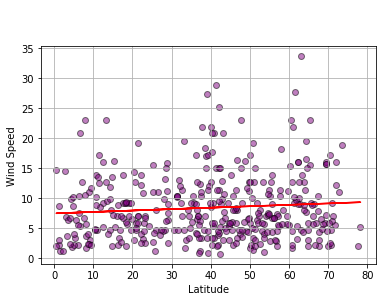

In [103]:
# Set x and y values
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['WindSpeed']

# Calculate linear regression, line equation and r squared
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2

# Create scatter plot with line equation
plt.scatter(x_values, y_values, alpha=.5, color='purple', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

##### Latitude vs. Wind Speed Linear Regression (Northern Hemisphere) Analysis
Linear regression shows only slight relationship and r-squared value is very low, both indicating very little relationship between humidity and latitude. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004168720594869873


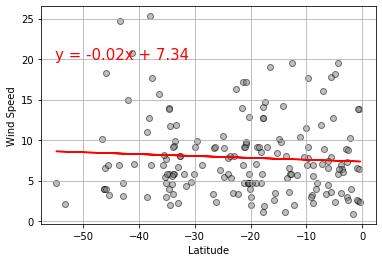

In [104]:
# Set x and y values
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['WindSpeed']

# Calculate linear regression, line equation and r squared
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2

# Create scatter plot with line equation
plt.scatter(x_values, y_values, color='grey', alpha=.5, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 20),fontsize=15,color="red")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

##### Latitude vs. Cloudiness Linear Regression (Southern Hemisphere) Analysis
Linear regression shows only slight relationship and r-squared value is very low, both indicating very little relationship between humidity and latitude. 